In [30]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock, cosine, euclidean
from scipy.special import softmax

mpl.rcParams["figure.figsize"] = (4, 3)
mpl.use("nbAgg")

In [31]:
X, y = make_blobs(n_samples=50, n_features=2, random_state=42,
                  cluster_std=1,
                  centers=[[0, -1], [-2, -3], [2, -3]])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Dark2")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
idx = np.random.randint(0, len(X), 3)
centroid = X[idx]
centroid

array([[-0.23415337, -1.23413696],
       [ 2.08704707, -3.29900735],
       [-2.11564828, -3.3011037 ]])

array([[ 0.49671415, -1.1382643 ],
       [ 0.64768854,  0.52302986],
       [-1.66873657, -2.02445487]])

In [33]:
from scipy.spatial.distance import euclidean

np.apply_along_axis(np.argmin, 1, np.c_[np.apply_along_axis(euclidean, 1, X, centroid[0]),
                                        np.apply_along_axis(euclidean, 1, X, centroid[1]),
                                        np.apply_along_axis(euclidean, 1, X, centroid[2])])

array([2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 1, 1, 0, 1, 0], dtype=int64)

array([2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 2], dtype=int64)

In [34]:
np.c_[np.apply_along_axis(euclidean, 1, X, centroid[0]),
      np.apply_along_axis(euclidean, 1, X, centroid[1]),
      np.apply_along_axis(euclidean, 1, X, centroid[2])]

array([[3.13212947, 3.39216104, 1.31382193],
       [0.4640133 , 3.56821875, 2.87867092],
       [3.46912163, 5.43788887, 1.31080773],
       [1.3572688 , 3.1235708 , 1.49944045],
       [1.74533902, 1.88497303, 2.38929583],
       [2.45819315, 0.72427196, 3.95118725],
       [1.52645389, 4.18894642, 1.78217618],
       [2.59425885, 0.78962027, 3.4136985 ],
       [2.94393125, 0.59781414, 4.44744022],
       [2.46377642, 1.26769202, 4.3999228 ],
       [1.10113335, 4.19987572, 2.84531652],
       [3.00268494, 0.10422611, 4.12129855],
       [3.71779677, 1.25923297, 3.90076288],
       [3.8047196 , 4.01953369, 1.53237854],
       [2.11854278, 4.94596481, 4.42070135],
       [2.70171531, 4.85023154, 1.07153884],
       [2.58944885, 3.76394742, 0.44767941],
       [1.63787403, 3.96615617, 1.35261314],
       [2.97465239, 4.56762793, 0.38141657],
       [2.60552862, 1.85741688, 4.8400784 ],
       [1.6998227 , 2.16435275, 4.13916324],
       [2.07157978, 3.10820891, 4.80290814],
       [0.

array([[3.50786803, 5.0828619 , 2.25066238],
       [1.07050307, 1.84799373, 1.59789034],
       [4.17153072, 5.18372226, 1.83306333],
       [1.89643505, 3.3221115 , 0.85387951],
       [1.79320387, 3.46017932, 2.10731597],
       [1.97776529, 3.36242541, 3.50406992],
       [2.26173482, 3.1587671 , 0.46556953],
       [2.33140234, 3.90520996, 3.24030246],
       [2.40832727, 3.65483315, 4.02872009],
       [1.83269583, 2.93693898, 3.76582044],
       [1.72600638, 2.13345441, 1.49281142],
       [2.58260293, 3.9952832 , 3.86802199],
       [3.50599597, 5.07815119, 4.08476533],
       [4.21601966, 5.76639193, 2.73861315],
       [2.27349677, 1.29204981, 3.06824804],
       [3.41095514, 4.41916449, 1.07183879],
       [3.12546204, 4.54669976, 1.36064635],
       [2.3397672 , 3.44318221, 0.        ],
       [3.61216509, 4.85094256, 1.41605232],
       [1.89256917, 2.62240162, 4.06919672],
       [0.97287853, 1.93064288, 3.23454153],
       [1.41141563, 1.19944215, 3.70945327],
       [1.

In [35]:
np.c_[[np.apply_along_axis(euclidean, 1, X, centroid[val_]) for val_ in np.unique(y)]]

array([[3.13212947, 0.4640133 , 3.46912163, 1.3572688 , 1.74533902,
        2.45819315, 1.52645389, 2.59425885, 2.94393125, 2.46377642,
        1.10113335, 3.00268494, 3.71779677, 3.8047196 , 2.11854278,
        2.70171531, 2.58944885, 1.63787403, 2.97465239, 2.60552862,
        1.6998227 , 2.07157978, 0.32587935, 4.41566848, 1.89681926,
        1.98968959, 4.03779563, 3.33051005, 0.73712883, 0.81156282,
        4.08713448, 2.79506254, 1.11199322, 3.5427335 , 1.01967764,
        0.85262138, 0.        , 1.96603163, 3.10671229, 1.2282373 ,
        2.11517182, 2.67854562, 4.12592824, 0.37097745, 2.33656816,
        3.4619345 , 4.35850442, 1.03759894, 2.20751723, 0.95239927],
       [3.39216104, 3.56821875, 5.43788887, 3.1235708 , 1.88497303,
        0.72427196, 4.18894642, 0.78962027, 0.59781414, 1.26769202,
        4.19987572, 0.10422611, 1.25923297, 4.01953369, 4.94596481,
        4.85023154, 3.76394742, 3.96615617, 4.56762793, 1.85741688,
        2.16435275, 3.10820891, 3.14098348, 1.6

array([[3.50786803, 1.07050307, 4.17153072, 1.89643505, 1.79320387,
        1.97776529, 2.26173482, 2.33140234, 2.40832727, 1.83269583,
        1.72600638, 2.58260293, 3.50599597, 4.21601966, 2.27349677,
        3.41095514, 3.12546204, 2.3397672 , 3.61216509, 1.89256917,
        0.97287853, 1.41141563, 1.01443915, 4.1666917 , 2.43901138,
        2.70829401, 4.45391992, 3.98013262, 0.        , 1.18196535,
        4.73994274, 3.39150582, 1.73610684, 3.12446121, 1.52569143,
        1.05152164, 0.73712883, 1.66814014, 2.68290315, 1.35618633,
        1.66316531, 2.4635004 , 4.72577764, 1.10802701, 3.06485549,
        2.86358049, 3.81469025, 1.75841298, 1.49723143, 1.57591044],
       [5.0828619 , 1.84799373, 5.18372226, 3.3221115 , 3.46017932,
        3.36242541, 3.1587671 , 3.90520996, 3.65483315, 2.93693898,
        2.13345441, 3.9952832 , 5.07815119, 5.76639193, 1.29204981,
        4.41916449, 4.54669976, 3.44318221, 4.85094256, 2.62240162,
        1.93064288, 1.19944215, 2.2780961 , 5.6

In [36]:
np.apply_along_axis(np.argmin, 0,
                    np.c_[[np.apply_along_axis(euclidean, 1, X, centroid[val_]) for val_ in np.unique(y)]])

array([2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0,
       2, 1, 1, 0, 1, 0], dtype=int64)

array([2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 2], dtype=int64)

In [37]:
centroid

array([[-0.23415337, -1.23413696],
       [ 2.08704707, -3.29900735],
       [-2.11564828, -3.3011037 ]])

array([[ 0.49671415, -1.1382643 ],
       [ 0.64768854,  0.52302986],
       [-1.66873657, -2.02445487]])

In [38]:
np.c_[[np.apply_along_axis(np.mean, 0, np.take_along_axis(X, np.argwhere(y == val_), axis=0))
       for val_ in np.unique(y)]]

array([[-0.1897225 , -1.13175064],
       [-2.11436987, -3.10217858],
       [ 1.8991118 , -2.97650459]])

array([[-0.1897225 , -1.13175064],
       [-2.11436987, -3.10217858],
       [ 1.8991118 , -2.97650459]])

In [39]:
new = np.c_[[np.apply_along_axis(np.mean, 0, X[y == val_, :])
             for val_ in np.unique(y)]]
new

array([[-0.1897225 , -1.13175064],
       [-2.11436987, -3.10217858],
       [ 1.8991118 , -2.97650459]])

array([[-0.1897225 , -1.13175064],
       [-2.11436987, -3.10217858],
       [ 1.8991118 , -2.97650459]])

In [40]:
np.r_[[euclidean(new[i], centroid[i])
       for i in range(len(new))]] < 1e-3

array([False, False, False])

array([False, False, False])

In [41]:
euclidean(X[0], centroid[0])

3.132129466068968

3.507868026144919

In [42]:
np.all(np.r_[[euclidean(new[i], centroid[i])
              for i in range(len(new))]] < 1e-3)

False

False

In [43]:
def check_convergence(new_, cur_, proximity_measure_):
    # print(new_,cur_)
    # print(np.r_[[euclidean(new_[i], cur_[i])
    #                      for i in range(len(new_))]])
    return np.all(np.r_[[proximity_measure_(new_[i], cur_[i])
                         for i in range(len(new_))]] < 1e-3)


In [44]:
plt.cm.get_cmap("Dark2")(0)

(0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0)

(0.10588235294117647, 0.6196078431372549, 0.4666666666666667, 1.0)

In [71]:
def k_means(n_clusters_, X_, y_, max_iter_=10, proximity_measure_=euclidean):
    # select k points as centroids
    idx_ = np.random.randint(0, len(X_), n_clusters_)
    cur_centroid_ = X_[idx_]
    iter_ = 0

    while True:
        # Form K clusters by assigning each point to its closest centroid
        cluster_set_ = np.apply_along_axis(np.argmin, 0, np.c_[
            [np.apply_along_axis(proximity_measure_, 1, X_, cur_centroid_[val_])
             for val_ in range(n_clusters_)]])

        # recompute the centroid
        new_centroid_ = np.c_[[np.apply_along_axis(np.mean, 0, X_[cluster_set_ == val_, :])
                               for val_ in range(n_clusters_)]]

        plt.scatter(X[:, 0], X[:, 1], c=cluster_set_)
        plt.scatter(cur_centroid_[:, 0], cur_centroid_[:, 1], marker="+", s=400, zorder=2, c="k")
        plt.title(f"Iteration {iter_}")
        plt.show()

        if check_convergence(new_centroid_, cur_centroid_, proximity_measure_) or iter_ >= max_iter_:
            #plot the original cluster
            plt.scatter(X[:, 0], X[:, 1], c=y_)
            plt.title("Original Plot")
            plt.show()
            print(f"Kmeans Center = {cur_centroid_}\n,Original Center ={original_center}")
            break

        cur_centroid_ = new_centroid_
        iter_ += 1

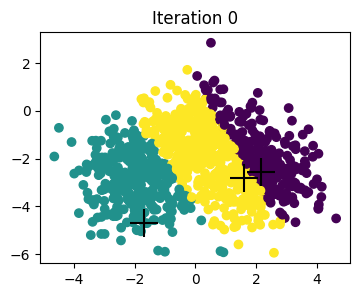

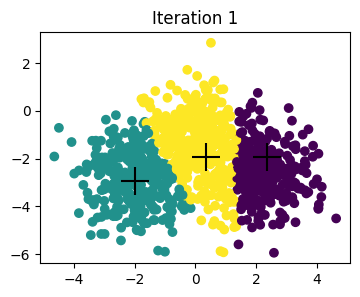

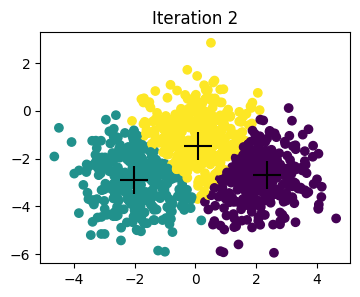

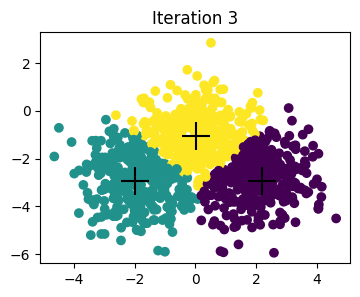

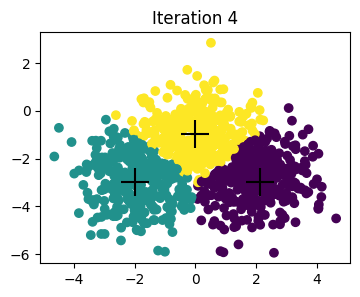

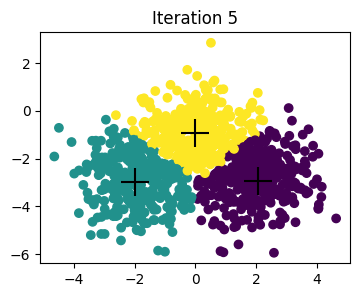

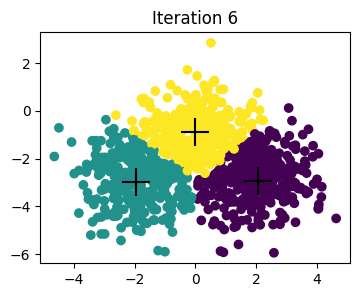

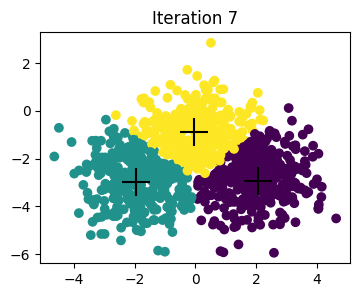

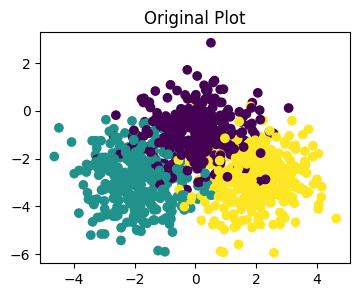

Kmeans Center = [[ 2.05635846 -2.93068053]
 [-1.96758534 -2.95813188]
 [-0.03341103 -0.88504536]]
,Original Center =[[0, -1], [-2, -3], [2, -3]]


In [72]:
original_center = [[0, -1], [-2, -3], [2, -3]]
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42,
                  cluster_std=1,
                  centers=original_center)
k_means(3, X, y, proximity_measure_=euclidean)

In [47]:
# it often reaches the suboptimal structure
original_center = [[2, 2], [-2, 2], [-2, -2], [2, -2]]
X, y = make_blobs(n_samples=60, n_features=2, random_state=42,
                  cluster_std=0.5,
                  centers=original_center)
k_means(4, X, y, proximity_measure_=euclidean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kmeans Center = [[ 1.69093895  1.77451127]
 [ 1.95285748 -1.97310911]
 [ 2.52365803  2.240803  ]
 [-2.05796421  0.00382537]]
,Original Center =[[2, 2], [-2, 2], [-2, -2], [2, -2]]
Kmeans Center = [[-2.05796421  0.00382537]
 [ 1.69093895  1.77451127]
 [ 1.95285748 -1.97310911]
 [ 2.52365803  2.240803  ]]
,Original Center =[[2, 2], [-2, 2], [-2, -2], [2, -2]]


In [48]:
np.c_[[np.apply_along_axis(euclidean, 1, X, X[i])
       for i in np.arange(3)]]

array([[0.        , 4.2172961 , 3.72842528, 6.0471687 , 3.60506332,
        3.6766054 , 3.92230641, 4.9117095 , 3.20810522, 0.56771414,
        5.08273074, 2.58901421, 4.74793846, 4.99902527, 4.30165283,
        6.00672571, 4.1191484 , 0.77978609, 0.72844705, 0.74321278,
        3.4461453 , 4.39671636, 3.67603386, 4.33325123, 0.51967605,
        2.96790613, 2.85927138, 5.34373813, 0.56015207, 3.22553679,
        4.48605425, 4.45150261, 3.55602857, 4.6592029 , 1.26618689,
        0.50839018, 1.22919928, 0.95676019, 3.65506091, 2.87755663,
        0.66507416, 4.09086925, 5.05567067, 3.7841205 , 3.6905143 ,
        3.46186082, 5.01583746, 0.51631313, 4.8218043 , 3.46416066,
        5.66881337, 3.72095771, 4.89284   , 0.59797855, 3.41804829,
        5.27319913, 4.41808643, 1.78468934, 3.33922665, 3.60358114],
       [4.2172961 , 0.        , 5.34184125, 5.12865874, 5.8180537 ,
        6.23043971, 0.74114708, 4.06332467, 5.98978935, 4.13360919,
        4.07397071, 5.48386112, 4.48922137, 3.7

array([[0.        , 4.2172961 , 3.72842528, 6.0471687 , 3.60506332,
        3.6766054 , 3.92230641, 4.9117095 , 3.20810522, 0.56771414,
        5.08273074, 2.58901421, 4.74793846, 4.99902527, 4.30165283,
        6.00672571, 4.1191484 , 0.77978609, 0.72844705, 0.74321278,
        3.4461453 , 4.39671636, 3.67603386, 4.33325123, 0.51967605,
        2.96790613, 2.85927138, 5.34373813, 0.56015207, 3.22553679,
        4.48605425, 4.45150261, 3.55602857, 4.6592029 , 1.26618689,
        0.50839018, 1.22919928, 0.95676019, 3.65506091, 2.87755663,
        0.66507416, 4.09086925, 5.05567067, 3.7841205 , 3.6905143 ,
        3.46186082, 5.01583746, 0.51631313, 4.8218043 , 3.46416066,
        5.66881337, 3.72095771, 4.89284   , 0.59797855, 3.41804829,
        5.27319913, 4.41808643, 1.78468934, 3.33922665, 3.60358114],
       [4.2172961 , 0.        , 5.34184125, 5.12865874, 5.8180537 ,
        6.23043971, 0.74114708, 4.06332467, 5.98978935, 4.13360919,
        4.07397071, 5.48386112, 4.48922137, 3.7

In [49]:
np.apply_along_axis(np.min, 0, np.c_[[np.apply_along_axis(euclidean, 1, X, X[i])
                                      for i in range(3)]])

array([0.        , 0.        , 0.        , 3.24230445, 0.74752563,
       1.27267394, 0.74114708, 2.64326718, 1.44656683, 0.56771414,
       2.83997586, 1.59023045, 2.05600809, 3.01762315, 0.868784  ,
       3.54209367, 1.01249513, 0.77978609, 0.72844705, 0.74321278,
       1.08820111, 2.11829169, 0.77709545, 0.5359194 , 0.51967605,
       1.29236031, 1.61973801, 2.70805517, 0.56015207, 1.18390565,
       1.46390731, 2.64254181, 1.3491961 , 1.81401604, 1.26618689,
       0.50839018, 1.22919928, 0.95676019, 0.70631802, 1.3598197 ,
       0.66507416, 0.38607525, 2.65539312, 0.46754031, 1.10739232,
       1.03553584, 2.97429499, 0.51631313, 0.62143994, 1.97636225,
       2.74689492, 0.53576942, 2.54899654, 0.59797855, 1.64514295,
       3.05117574, 0.24758863, 1.78468934, 0.8981907 , 1.81658044])

array([0.        , 0.        , 0.        , 3.24230445, 0.74752563,
       1.27267394, 0.74114708, 2.64326718, 1.44656683, 0.56771414,
       2.83997586, 1.59023045, 2.05600809, 3.01762315, 0.868784  ,
       3.54209367, 1.01249513, 0.77978609, 0.72844705, 0.74321278,
       1.08820111, 2.11829169, 0.77709545, 0.5359194 , 0.51967605,
       1.29236031, 1.61973801, 2.70805517, 0.56015207, 1.18390565,
       1.46390731, 2.64254181, 1.3491961 , 1.81401604, 1.26618689,
       0.50839018, 1.22919928, 0.95676019, 0.70631802, 1.3598197 ,
       0.66507416, 0.38607525, 2.65539312, 0.46754031, 1.10739232,
       1.03553584, 2.97429499, 0.51631313, 0.62143994, 1.97636225,
       2.74689492, 0.53576942, 2.54899654, 0.59797855, 1.64514295,
       3.05117574, 0.24758863, 1.78468934, 0.8981907 , 1.81658044])

In [50]:
np.apply_along_axis(softmax, 0, np.apply_along_axis(np.min, 0, np.c_[[np.apply_along_axis(euclidean, 1, X, X[i])
                                                                      for i in range(3)]]))

array([0.00267861, 0.00267861, 0.00267861, 0.06855257, 0.00565659,
       0.00956366, 0.00562063, 0.03765869, 0.01138007, 0.00472568,
       0.04584528, 0.01313824, 0.02093253, 0.05475779, 0.00638582,
       0.09251679, 0.00737276, 0.00584205, 0.0055497 , 0.00563225,
       0.00795259, 0.02227774, 0.00582636, 0.00457779, 0.00450403,
       0.0097538 , 0.01353169, 0.04017929, 0.00469007, 0.0087513 ,
       0.01157912, 0.03763138, 0.01032422, 0.01643334, 0.00950182,
       0.00445348, 0.00915679, 0.00697308, 0.00542824, 0.01043448,
       0.00520891, 0.00394075, 0.03811811, 0.00427523, 0.00810668,
       0.0075446 , 0.0524359 , 0.00448891, 0.00498651, 0.01933001,
       0.04177054, 0.0045771 , 0.03427078, 0.00487088, 0.01387987,
       0.05662622, 0.00343111, 0.01595841, 0.0065764 , 0.01647554])

array([0.00267861, 0.00267861, 0.00267861, 0.06855257, 0.00565659,
       0.00956366, 0.00562063, 0.03765869, 0.01138007, 0.00472568,
       0.04584528, 0.01313824, 0.02093253, 0.05475779, 0.00638582,
       0.09251679, 0.00737276, 0.00584205, 0.0055497 , 0.00563225,
       0.00795259, 0.02227774, 0.00582636, 0.00457779, 0.00450403,
       0.0097538 , 0.01353169, 0.04017929, 0.00469007, 0.0087513 ,
       0.01157912, 0.03763138, 0.01032422, 0.01643334, 0.00950182,
       0.00445348, 0.00915679, 0.00697308, 0.00542824, 0.01043448,
       0.00520891, 0.00394075, 0.03811811, 0.00427523, 0.00810668,
       0.0075446 , 0.0524359 , 0.00448891, 0.00498651, 0.01933001,
       0.04177054, 0.0045771 , 0.03427078, 0.00487088, 0.01387987,
       0.05662622, 0.00343111, 0.01595841, 0.0065764 , 0.01647554])

In [51]:
np.sum(np.apply_along_axis(softmax, 0, np.apply_along_axis(np.min, 0, np.c_[[np.apply_along_axis(euclidean, 1, X, X[i])
                                                                      for i in range(3)]])))

0.9999999999999998

0.9999999999999998

In [52]:
np.apply_along_axis(np.sum, 1, np.apply_along_axis(softmax, 1, np.c_[[np.apply_along_axis(euclidean, 1, X, X[i])
                                                                      for i in range(3)]]))


array([1., 1., 1.])

array([1., 1., 1.])

In [53]:
np.apply_along_axis(np.min, 0, np.apply_along_axis(softmax, 1, np.c_[[np.apply_along_axis(euclidean, 1, X, X[i])
                                                                      for i in range(3)]]))

array([0.00023906, 0.00010537, 0.00026247, 0.00671737, 0.00055428,
       0.00093713, 0.0002211 , 0.00369012, 0.00111512, 0.00042176,
       0.00449232, 0.0012874 , 0.00205115, 0.00454724, 0.0002512 ,
       0.0090656 , 0.00072245, 0.00052139, 0.0004953 , 0.00050267,
       0.00077926, 0.00218297, 0.00022919, 0.00018008, 0.00040198,
       0.00038369, 0.00132595, 0.00393711, 0.00041858, 0.00034425,
       0.00113462, 0.00357842, 0.00101166, 0.00161028, 0.00084802,
       0.00039746, 0.00081723, 0.00062233, 0.00021353, 0.00041046,
       0.00046488, 0.00015502, 0.00373514, 0.00016817, 0.00079436,
       0.00073929, 0.00487752, 0.00040063, 0.00019615, 0.00189412,
       0.00409304, 0.00018005, 0.00335815, 0.00043472, 0.00136007,
       0.00554873, 0.00013497, 0.00142426, 0.0002587 , 0.00161442])

array([0.00023906, 0.00010537, 0.00026247, 0.00671737, 0.00055428,
       0.00093713, 0.0002211 , 0.00369012, 0.00111512, 0.00042176,
       0.00449232, 0.0012874 , 0.00205115, 0.00454724, 0.0002512 ,
       0.0090656 , 0.00072245, 0.00052139, 0.0004953 , 0.00050267,
       0.00077926, 0.00218297, 0.00022919, 0.00018008, 0.00040198,
       0.00038369, 0.00132595, 0.00393711, 0.00041858, 0.00034425,
       0.00113462, 0.00357842, 0.00101166, 0.00161028, 0.00084802,
       0.00039746, 0.00081723, 0.00062233, 0.00021353, 0.00041046,
       0.00046488, 0.00015502, 0.00373514, 0.00016817, 0.00079436,
       0.00073929, 0.00487752, 0.00040063, 0.00019615, 0.00189412,
       0.00409304, 0.00018005, 0.00335815, 0.00043472, 0.00136007,
       0.00554873, 0.00013497, 0.00142426, 0.0002587 , 0.00161442])

In [54]:
def k_means_plus_plus_init(n_clusters_, X_,proximity_measure_=euclidean):
    n_samples_ = len(X_)
    idx_ = np.random.randint(0, n_samples_, 1)
    centroid_idx_ = idx_
    for _ in range(n_clusters_ - 1):
        # compute the distance
        dist = np.c_[[np.apply_along_axis(proximity_measure_, 1, X_, X_[i])
                      for i in centroid_idx_]]

        # choose the minimum distance
        min_dist = np.apply_along_axis(np.min,0,dist)

        # distance to proba using the softmax function
        proba = softmax(min_dist)

        # find the next centroid point
        next_centroid_idx = np.random.choice(n_samples_, size=1, p=proba)
        centroid_idx_ = np.append(centroid_idx_, next_centroid_idx)

    return centroid_idx_

In [55]:
k_means_plus_plus_init(n_clusters_=3, X_=X)

array([24,  5, 15])

array([ 6, 54, 47])

In [56]:
def k_means_plus_plus(n_clusters_, X_, y_, max_iter_=10, proximity_measure_=euclidean, show_only_final_=False):
    # select k points as centroids using the k++ technique
    idx_ = k_means_plus_plus_init(n_clusters_,X_,proximity_measure_)
    cur_centroid_ = X_[idx_]
    iter_ = 0

    while True:
        # Form K clusters by assigning each point to its closest centroid
        cluster_set_ = np.apply_along_axis(np.argmin, 0, np.c_[
            [np.apply_along_axis(proximity_measure_, 1, X_, cur_centroid_[val_])
             for val_ in range(n_clusters_)]])

        # recompute the centroid
        new_centroid_ = np.c_[[np.apply_along_axis(np.mean, 0, X_[cluster_set_ == val_, :])
                               for val_ in range(n_clusters_)]]
        if not show_only_final_:
            plt.scatter(X[:, 0], X[:, 1], c=cluster_set_)
            plt.scatter(cur_centroid_[:, 0], cur_centroid_[:, 1], marker="+", s=400, zorder=2, c="k")
            plt.title(f"Iteration {iter_}")
            plt.show()

        if check_convergence(new_centroid_, cur_centroid_, proximity_measure_) or iter_ >= max_iter_:
            if show_only_final_:
                ax = plt.subplot(122)
                plt.setp(ax,title=f"Final Iteration {iter_}",xticks=(),yticks=())
                plt.scatter(X[:, 0], X[:, 1], c=cluster_set_)
                plt.scatter(cur_centroid_[:, 0], cur_centroid_[:, 1], marker="+", s=400, zorder=2, c="k")

                ax = plt.subplot(121)
                plt.setp(ax,title="Original Plot",xticks=(),yticks=())
                plt.scatter(X[:, 0], X[:, 1], c=y_)

                plt.show()

            else:
                #plot the original cluster
                plt.scatter(X[:, 0], X[:, 1], c=y_)
                plt.title("Original Plot")
                plt.show()
            # print(f"Kmeans Center = {cur_centroid_}\n,Original Center ={original_center}")
            break

        cur_centroid_ = new_centroid_
        iter_ += 1

In [57]:
original_center = [[2, 2], [-2, 2], [-2, -2], [2, -2]]
X, y = make_blobs(n_samples=60, n_features=2, random_state=42,
                  cluster_std=0.5,
                  centers=original_center)
k_means_plus_plus(4, X, y, proximity_measure_=euclidean)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

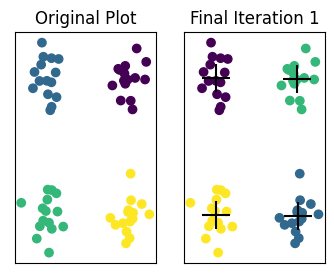

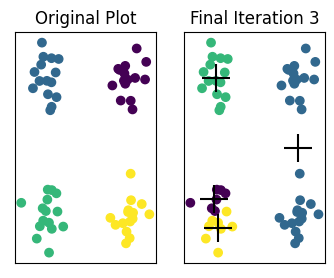

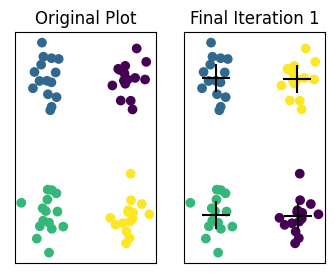

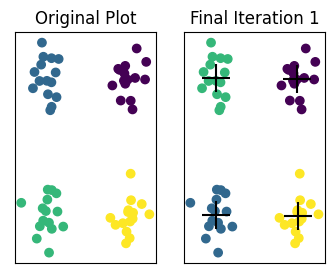

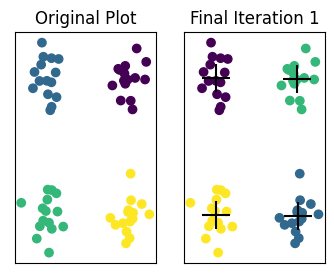

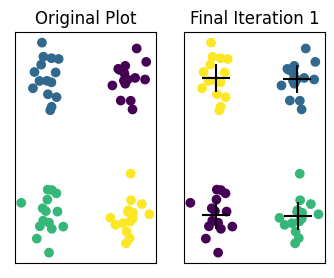

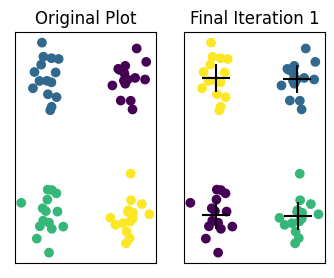

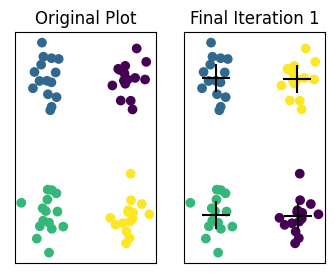

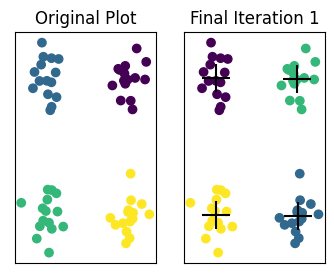

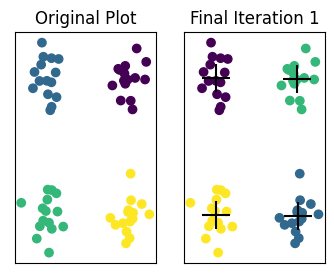

In [59]:
%matplotlib inline
for _ in range(10):
    k_means_plus_plus(4,X,y,show_only_final_=True)

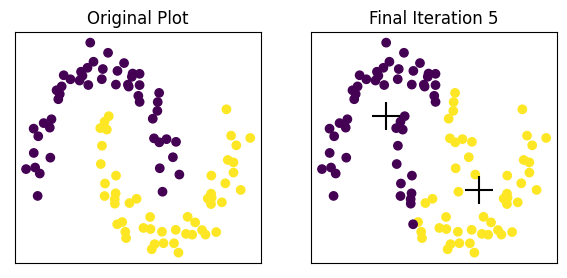

In [65]:
from sklearn.datasets import make_moons

plt.figure(figsize=(7,3))
X,y = make_moons(n_samples=100,random_state=42,noise=0.1)
k_means_plus_plus(2,X,y,show_only_final_=True)